# 3. Assessing Covariance of Habitat Metrics
MS 263 Final Project

Caroline Daley | Moss Landing Marine Laboratories 

May 2025

In [14]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
from scipy import linalg
import os

Import the habitat metrics dataset that you generated in the 'Zonal Statistics with CCFRP Gridcells' notebook as a .csv file. Remove columns and rows of habitat metrics that are populated by NaN values. 

In [3]:
df = pd.read_csv('/Users/carolinedaley/Documents/MLML/MS263/Project/habitat_metrics_summary.csv')

# Remove rows where habitat metrics are Nan
habitat_metrics = ['aspect', 'curvature', 'rugosity', 'slope', 'index']
df_cleaned = df.dropna(subset=habitat_metrics, how='all')

# Remove columns that have no data 
df_cleaned = df_cleaned.dropna(axis=1, how='all')

In [4]:
df_cleaned

,ID,Site,aspect,curvature,rugosity,slope,index
100,REF,Point Conception,198.310460,0.000473,1.002540,2.543214,0.127306
101,MPA,Point Conception,191.860160,0.011771,1.002166,3.245501,0.142615
102,MPA,Point Conception,170.073168,0.009044,1.001392,2.724835,0.120513
103,MPA,Point Conception,182.385872,0.007920,1.001180,2.441027,0.108269
104,REF,Point Conception,192.110644,0.000405,1.000722,1.534782,0.073460
...,...,...,...,...,...,...,...
419,REF,Cape Mendocino,182.757239,0.002168,1.035670,10.292155,1.041077
420,REF,Cape Mendocino,181.971878,0.016504,1.042806,11.395760,1.160871
421,REF,Cape Mendocino,181.020959,0.011323,1.039909,11.477960,1.147830
422,REF,Cape Mendocino,176.341652,-0.003131,1.023055,8.533854,0.833589


Define the habiat metrics that you are intersted in analyzing. This variable will be called throughout the code, so make sure it's up to date! 

In [5]:
habitat_metrics = ['aspect', 'curvature', 'rugosity', 'slope', 'index']

## Principal Component Analysis of Habitat Metrics

Create a data matrix containing the variables plotted above, and create a second matrix where each variable has been standardized by computing the z-scores. 

In [4]:
habitat_data = df_cleaned[habitat_metrics]
print(np.shape(habitat_data))

(190, 5)


In [5]:
habitat_norm = (habitat_data - np.mean(habitat_data, axis = 0)) / np.std(habitat_data, axis = 0, ddof= 1)
# axis = 0 specifies that means are by column, ddof = 1 specifies that std is unbiased  
np.shape(habitat_norm)

(190, 5)

In [6]:
# sanity check! 
print(np.mean(habitat_norm, axis = 0)) # should be computuationally zero
print(np.std(habitat_norm, axis = 0, ddof = 1)) # should be 1's 

aspect       4.207161e-15
curvature   -1.869849e-17
rugosity     6.450980e-15
slope        1.495879e-16
index        2.243819e-16
dtype: float64
aspect       1.0
curvature    1.0
rugosity     1.0
slope        1.0
index        1.0
dtype: float64


Extract the eigenvalues and eigenvectors of the correlation matrix. 

In [7]:
# compute correlation matrix 
R = np.cov(habitat_norm, rowvar = False)
print(R)
print(R.shape)

[[ 1.         -0.03294587 -0.25395942 -0.36042338 -0.30977739]
 [-0.03294587  1.         -0.0413706  -0.01704724 -0.02753793]
 [-0.25395942 -0.0413706   1.          0.93799083  0.94552321]
 [-0.36042338 -0.01704724  0.93799083  1.          0.99171463]
 [-0.30977739 -0.02753793  0.94552321  0.99171463  1.        ]]
(5, 5)


In [9]:
values, vectors = linalg.eig(R)
values = np.real(values)

Sort the eigenvalues and eigenvectors so that they are arranged in order of decreasing variance (PC1 first, PC2 second, etc.). 

In [10]:
idx = values.argsort()[::-1]   
values_sorted = values[idx]
vectors_sorted = vectors[:,idx]

print(values_sorted)
print(vectors_sorted)

[3.05662621 1.01370555 0.85299039 0.0699558  0.00672205]
[[ 0.25119399 -0.29061529  0.91945583  0.07464484 -0.03838564]
 [ 0.01921919  0.95433511  0.29774471 -0.01395508  0.0053354 ]
 [-0.54795815 -0.06148084  0.19492885 -0.81067911 -0.02764222]
 [-0.56541133 -0.00609145  0.08860784  0.42779738 -0.69957913]
 [-0.56265806 -0.03114886  0.14177609  0.39245659  0.71296775]]


Compute and plot the factor loadings. 

In [11]:
Lambda = np.diag(values)

A = np.dot(vectors, Lambda**0.5)

In [12]:
percent_variance_PC1 = int(100*(values_sorted[0]/np.sum(values_sorted)))
percent_variance_PC2 = int(100*(values_sorted[1]/np.sum(values_sorted)))

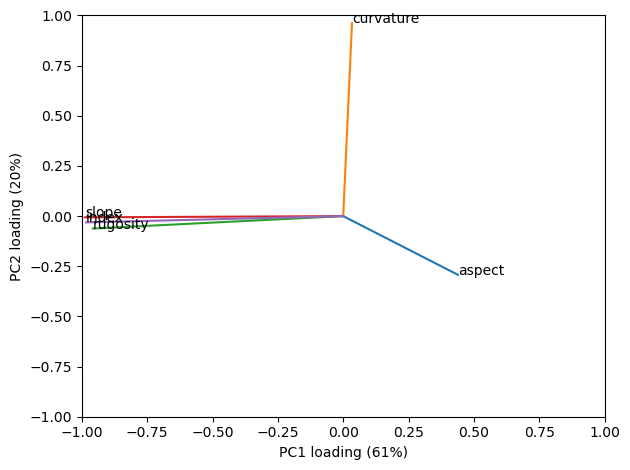

In [15]:
plt.figure()
plt.xlim([-1,1])
plt.ylim([-1,1])

plt.xlabel(f'PC1 loading ({percent_variance_PC1}%)')
plt.ylabel(f'PC2 loading ({percent_variance_PC2}%)')

for i,txt in enumerate(habitat_metrics):
    plt.plot([0,A[i,0]],[0,A[i,1]],'-')
    plt.text(A[i,0],A[i,1],txt)
    
plt.tight_layout()

output_dir = "/Users/carolinedaley/Documents/MLML/MS263/Project/Figures"

output_path = os.path.join(output_dir, "habitat_metrics_PCA.png")
plt.savefig(output_path, dpi=300)

plt.show()